In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [173]:
%matplotlib inline

In [174]:
df = pd.read_csv('HW2.csv')
df.head()

/var/folders/qs/5vt90tvd159ctgq252mwn07r0000gn/T/ipykernel_92460/3949404760.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('HW2.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [176]:
df2 = df[[column for column in df if df[column].count()/len(df) >= 0.3]]
del df2['ID']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end = ', ')
print('\n')
df = df2

List of dropped columns: ID, 



In [177]:
print(df.isnull().values.any())
print(df.shape)

True
(100000, 27)


In [178]:
print(df.isnull().sum())

Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [179]:
df.dropna(inplace=True)

Since the frequency of missing values are not too significant, we can decide to drop the null values and still be able to find some insights.

In [180]:
for col in df:
    print(df[col].describe())
    print("\n")

count          53049
unique         11071
top       CUS_0x533b
freq               8
Name: Customer_ID, dtype: object


count       53049
unique          8
top       January
freq         6744
Name: Month, dtype: object


count      53049
unique      9168
top       Stevex
freq          30
Name: Name, dtype: object


count     53049
unique     1057
top          38
freq       1567
Name: Age, dtype: object


count         53049
unique        11064
top       #F%$D@*&8
freq           2971
Name: SSN, dtype: object


count       53049
unique         16
top       _______
freq         3727
Name: Occupation, dtype: object


count        53049
unique       14707
top       20867.67
freq            11
Name: Annual_Income, dtype: object


count    53049.000000
mean      4024.502617
std       3094.967739
min        303.645417
25%       1575.345833
50%       2991.016667
75%       5712.553333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


count    53049.000000
mean        16.842806
s

In [181]:
df = df[~df['Occupation'].str.contains("_")]
df = df[df['Num_Bank_Accounts']>0]
df = df[df['Delay_from_due_date']>0]
df = df[~df['Age'].astype(str).str.contains('_')]
df = df[df['Age'].astype(int)>0]
df = df[df['Age'].astype(int)<100]
df = df[~df['Amount_invested_monthly'].astype(str).str.contains('_')]
df = df[~df['Monthly_Balance'].astype(str).str.contains('_')]
df = df[~df['Changed_Credit_Limit'].astype(str).str.contains('_')]
df = df[~df['SSN'].astype(str).str.contains('#F%')]
df = df[~df['Num_of_Loan'].astype(str).str.contains('_')]
df = df[df['Num_of_Loan'].astype(int)>0]
df = df[~df['Credit_Mix'].astype(str).str.contains('_')]
df = df[~df['Payment_Behaviour'].astype(str).str.contains('!@')]
df = df[df['Changed_Credit_Limit'].astype(float)>0]
df = df[df['Num_Credit_Inquiries'].astype(int)<40]
df = df[df['Num_Credit_Inquiries'].astype(int)>0]
df = df[df['Num_of_Loan'].astype(int)<40]
df = df[df['Num_Bank_Accounts']<20]
df = df[df['Num_Credit_Card']<20]
df = df[df['Num_Credit_Card']>0]
df = df[df['Interest_Rate']<100]
df = df[df['Total_EMI_per_month']<2000.0]
df = df[~df['Num_of_Delayed_Payment'].astype(str).str.contains('_')]
df = df[df['Num_of_Delayed_Payment'].astype(int)<100]
df = df[~df['Annual_Income'].astype(str).str.contains('_')]
df = df[~df['Outstanding_Debt'].astype(str).str.contains('_')]
df = df[df['Annual_Income'].astype(float)<600000.0]

In [182]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float).round(3)
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].round(3)
df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].round(3)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float).round(3)
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float).round(3)
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].round(3)
df['Annual_Income'] = df['Annual_Income'].astype(float).round(3)

In [183]:
'''
Now let's change the data type from object to int/float for the columns:
int--
Age
Num_of_Loan
Delay_from_due_date

float--
Outstanding_Debt
'''
df['Age'] = df['Age'].astype('int64')
df['Num_of_Loan'] = df['Num_of_Loan'].astype('int64')
df['Delay_from_due_date'] = df['Delay_from_due_date'].astype('int64')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('int64')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17431 entries, 9 to 99991
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               17431 non-null  object 
 1   Month                     17431 non-null  object 
 2   Name                      17431 non-null  object 
 3   Age                       17431 non-null  int64  
 4   SSN                       17431 non-null  object 
 5   Occupation                17431 non-null  object 
 6   Annual_Income             17431 non-null  float64
 7   Monthly_Inhand_Salary     17431 non-null  float64
 8   Num_Bank_Accounts         17431 non-null  int64  
 9   Num_Credit_Card           17431 non-null  int64  
 10  Interest_Rate             17431 non-null  int64  
 11  Num_of_Loan               17431 non-null  int64  
 12  Type_of_Loan              17431 non-null  object 
 13  Delay_from_due_date       17431 non-null  int64  
 14  Num_of

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>],
       [<AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>,
        <AxesSubplot:title={'center':'Amount_invested_monthly'}>,
        <AxesSubplot:title={'center':'Monthly_Balance'}>]], dtype=object)

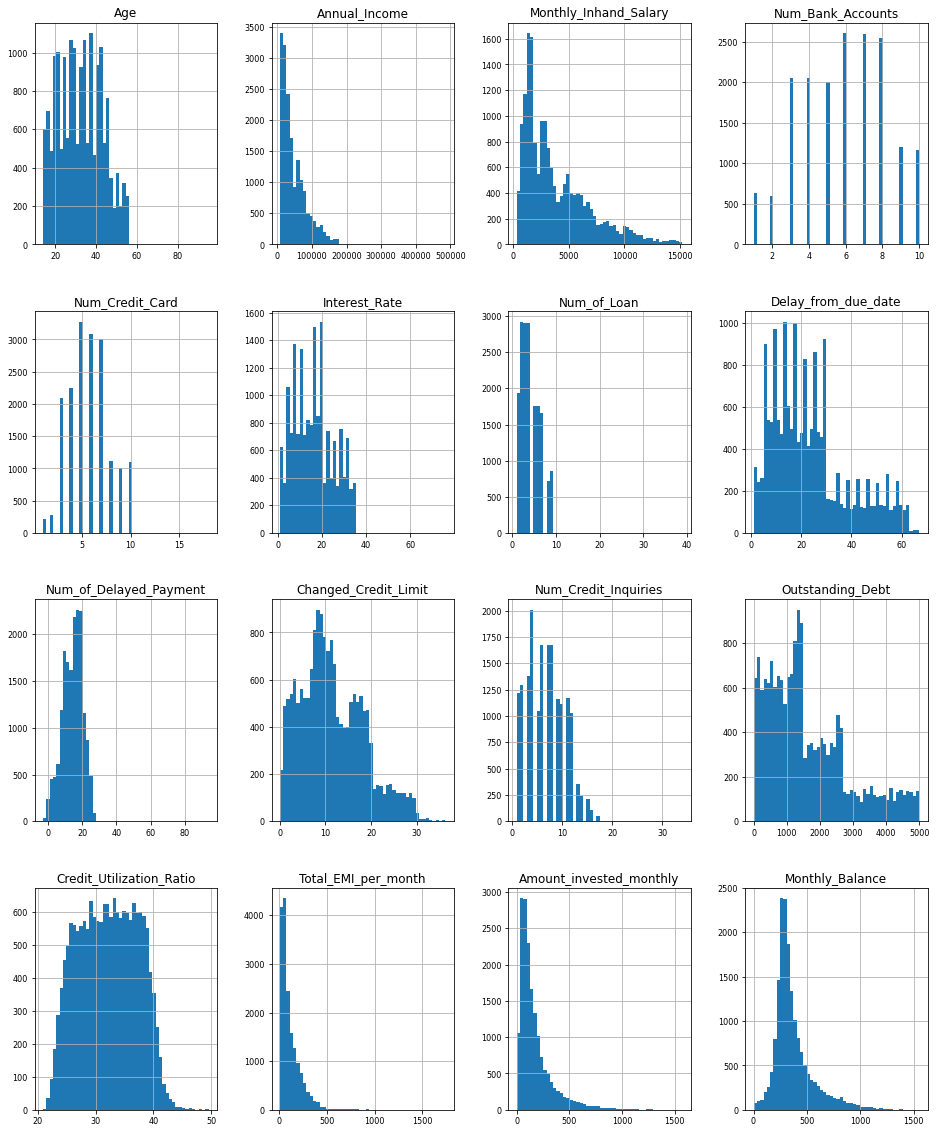

In [184]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

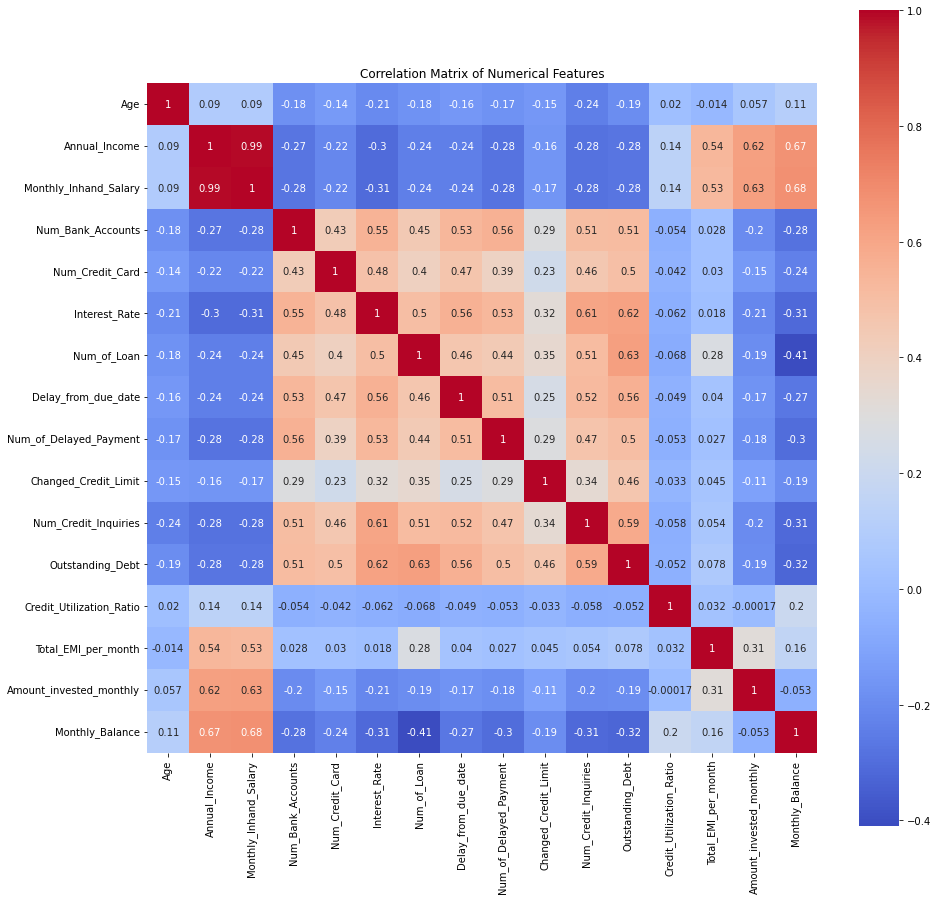

In [185]:
corr_matrix = df_num.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Given the strong correlation between "Annual_Income" and "Monthly_Inhand_Salary", it is advisable to drop one of the variables. In this case, I will remove "Annual_Income" as the distribution of "Monthly_Inhand_Salary" appears to be more balanced.

In [186]:
df.drop(columns=['Annual_Income'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17431 entries, 9 to 99991
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               17431 non-null  object 
 1   Month                     17431 non-null  object 
 2   Name                      17431 non-null  object 
 3   Age                       17431 non-null  int64  
 4   SSN                       17431 non-null  object 
 5   Occupation                17431 non-null  object 
 6   Monthly_Inhand_Salary     17431 non-null  float64
 7   Num_Bank_Accounts         17431 non-null  int64  
 8   Num_Credit_Card           17431 non-null  int64  
 9   Interest_Rate             17431 non-null  int64  
 10  Num_of_Loan               17431 non-null  int64  
 11  Type_of_Loan              17431 non-null  object 
 12  Delay_from_due_date       17431 non-null  int64  
 13  Num_of_Delayed_Payment    17431 non-null  int64  
 14  Change

In [187]:
df.shape

(17431, 26)

In [189]:
ohe_features = ['Customer_ID', 
                'Month',
                'Name', 
                'SSN', 
                'Occupation' 
                ]

te_features = [ 'Type_of_Loan',                  
                'Credit_Mix',                 
                'Credit_History_Age', 
                'Payment_of_Min_Amount', 
                'Payment_Behaviour', 
                ]

num_features = ['Age',
                'Monthly_Balance',
                'Amount_invested_monthly',
                'Outstanding_Debt',
                'Changed_Credit_Limit',
                'Num_of_Delayed_Payment',
                'Monthly_Inhand_Salary',
                'Num_Bank_Accounts',
                'Num_Credit_Card',
                'Interest_Rate',
                'Num_of_Loan',
                'Delay_from_due_date',
                'Num_Credit_Inquiries',
                'Credit_Utilization_Ratio', 
                'Total_EMI_per_month']

feature_names = ohe_features + te_features + num_features

In [188]:
# Encode non-numeric values
categorical_cols = ['Credit_Score'] + ohe_features + te_features
for col in categorical_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [196]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


X_dev, X_test, y_dev, y_test = train_test_split(df[feature_names], df[['Credit_Score']], stratify=df[['Credit_Score']], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, stratify=y_dev, test_size=0.2, random_state=42)

lg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
preprocess = make_column_transformer((StandardScaler(), num_features),
                                    (OneHotEncoder(handle_unknown='ignore'), ohe_features),
                                     (TargetEncoder(handle_unknown='ignore'), te_features),
                                     remainder='passthrough')
pipe = make_pipeline(preprocess, GridSearchCV(lg,
                                             param_grid={},
                                             return_train_score=True))

pipe.fit(X_train, y_train)
grid_search_results = pipe.named_steps['gridsearchcv'] 
print(f"Best train score: ", grid_search_results.best_score_) 
print(f"Best train alpha: ", grid_search_results.best_params_) 
print(f"Test score:", pipe.score(X_dev, y_dev))

/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Best train score:  0.6649036306588973
Best train alpha:  {}
Test score: 0.6645152036718301


/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


During the model development phase, a validation dataset is used to improve the performance of a model by evaluating its performance on a subset of the original data that is held out during training. This dataset is used to fine-tune the model's hyperparameters and select the best performing model. While the validation dataset is helpful in improving the model's performance during training, it should not be used to obtain a final estimate of the model's performance on new, unseen data. Instead, a separate test dataset should be used for this purpose to ensure an unbiased estimate of the model's performance.

In [192]:
y_pred = pipe.predict(X_val)
val_acc = accuracy_score(y_val, y_pred)
val_report = classification_report(y_val, y_pred)
print("Validation accuracy:", val_acc)
print("Validation classification report:", val_report)

Validation accuracy: 0.6457511652922194
Validation classification report:               precision    recall  f1-score   support

           0       0.56      0.46      0.51       373
           1       0.67      0.54      0.60       945
           2       0.65      0.76      0.70      1471

    accuracy                           0.65      2789
   macro avg       0.63      0.59      0.60      2789
weighted avg       0.65      0.65      0.64      2789



In [193]:
y_pred = pipe.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
test_report = classification_report(y_test, y_pred)
print("Test accuracy:", test_acc)
print("Test classification report:", test_report)

Test accuracy: 0.6498422712933754
Test classification report:               precision    recall  f1-score   support

           0       0.56      0.46      0.51       467
           1       0.67      0.55      0.61      1181
           2       0.66      0.76      0.70      1839

    accuracy                           0.65      3487
   macro avg       0.63      0.59      0.61      3487
weighted avg       0.65      0.65      0.64      3487



Based on the classification report, the model has an overall test accuracy of 0.65, meaning it correctly predicted 65% of the samples in the test set.

The precision for class 0 is 0.56, meaning that out of all the samples the model predicted to be in class 0, only 56% of them are actually in class 0. The recall for class 0 is 0.46, meaning that out of all the samples in class 0, the model correctly predicted 46% of them. The F1-score for class 0 is 0.51, which is the harmonic mean of precision and recall.

Similarly, for class 1, the precision is 0.67, the recall is 0.55, and the F1-score is 0.61. For class 2, the precision is 0.66, the recall is 0.76, and the F1-score is 0.70.

The macro-average F1-score is 0.61, which is the average of the F1-scores for all three classes. The weighted-average F1-score is 0.64, which takes into account the imbalance in the number of samples in each class. Overall, the model performs reasonably well but may need further improvements, especially for predicting class 0.

CART has several benefits, such as producing easily interpretable decision trees, processing both numerical and categorical data for classification and regression, and handling missing data through exclusion during tree construction. However, the algorithm is susceptible to overfitting when the tree grows too deep or when the stopping criterion is not optimized.

In [204]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier(random_state=82)
preprocess = make_column_transformer((StandardScaler(), num_features),
                                    (OneHotEncoder(handle_unknown='ignore'), ohe_features),
                                     (TargetEncoder(handle_unknown='ignore'), te_features),
                                     remainder='passthrough')
pipe = make_pipeline(preprocess, GridSearchCV(dtc,
                                             param_grid={},
                                             return_train_score=True))

pipe.fit(X_train, y_train)
grid_search_results = pipe.named_steps['gridsearchcv'] 
print(f"Best train score: ", grid_search_results.best_score_) 
print(f"Best train alpha: ", grid_search_results.best_params_) 
print(f"Test score:", pipe.score(X_dev, y_dev))

Best train score:  0.6893769610040341
Best train alpha:  {}
Test score: 0.9386115892139989


/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/category_encoders/utils.py:360: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


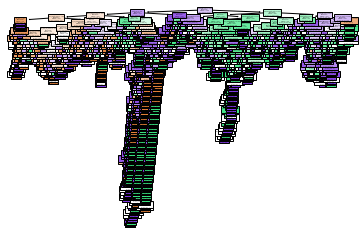

In [205]:
best_tree = grid_search_results.best_estimator_
ohe_feature_names = preprocess.named_transformers_['onehotencoder'].get_feature_names()
te_feature_names = preprocess.named_transformers_['targetencoder'].get_feature_names()
feature_names = num_features + ohe_feature_names.tolist() + te_feature_names
visual_tree = plot_tree(best_tree, feature_names=feature_names, filled=True)
plt.show()

In [206]:
test_accuracies = []

for i in range(30):
    dtc = DecisionTreeClassifier(random_state=i)
    preprocess = make_column_transformer((StandardScaler(), num_features),
                                         (OneHotEncoder(handle_unknown='ignore'), ohe_features),
                                         (TargetEncoder(handle_unknown='ignore'), te_features),
                                         remainder='passthrough')
    pipe = make_pipeline(preprocess, GridSearchCV(dtc,
                                                 param_grid={},
                                                 return_train_score=True))
    pipe.fit(X_train, y_train)
    test_accuracy = pipe.score(X_dev, y_dev)
    test_accuracies.append(test_accuracy)
    print(f"Run {i}: test score = {test_accuracy}")

test_accuracies = np.array(test_accuracies)
mean_accuracy = np.mean(test_accuracies)
std_accuracy = np.std(test_accuracies)

print(f"Average accuracy: {mean_accuracy}")
print(f"Standard deviation: {std_accuracy}")

Run 0: test score = 0.9403327596098681
Run 1: test score = 0.9395438898450946
Run 2: test score = 0.9389701663798049
Run 3: test score = 0.9389701663798049
Run 4: test score = 0.9398307515777395
Run 5: test score = 0.9386833046471601
Run 6: test score = 0.9386833046471601
Run 7: test score = 0.9397590361445783
Run 8: test score = 0.9400458978772231
Run 9: test score = 0.9388984509466437
Run 10: test score = 0.9399024670109007
Run 11: test score = 0.9394004589787722
Run 12: test score = 0.9396873207114171
Run 13: test score = 0.9395438898450946
Run 14: test score = 0.9398307515777395
Run 15: test score = 0.9403327596098681
Run 16: test score = 0.9391135972461274
Run 17: test score = 0.9381095811818704
Run 18: test score = 0.9391853126792886
Run 19: test score = 0.9399024670109007
Run 20: test score = 0.9390418818129661
Run 21: test score = 0.9399024670109007
Run 22: test score = 0.9392570281124498
Run 23: test score = 0.9397590361445783
Run 24: test score = 0.9386833046471601
Run 25: te

Both bagging and random forests are powerful ensemble learning techniques that utilize multiple decision trees to enhance model performance. Bagging generates independent bootstrap samples of the training data, and fits a decision tree to each sample, with predictions being aggregated across all trees in the ensemble. On the other hand, random forests use a specific type of bagging, where each decision tree is trained on a random subset of features, reducing the risk of overfitting and increasing generalization performance. Random forests also employ feature bagging, or random subspace method, to add more randomness to the model, and further reduce overfitting. Overall, random forests are a more sophisticated approach than bagging for boosting model performance.

Feature subsampling, a key technique in random forest models, trains each decision tree on a random subset of features, reducing correlation between trees, avoiding overfitting, and increasing model performance. By enabling the model to focus on the most important features while ignoring the noise, this technique is efficient in handling high-dimensional and complex data. 

In [203]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
param_grid = {}
pipe = make_pipeline(preprocess, GridSearchCV(rfc,
                                             param_grid = param_grid,
                                             return_train_score=True))
pipe.fit(X_train, y_train)
grid_search_results = pipe.named_steps['gridsearchcv']
print(f"Best train score: ", grid_search_results.best_score_) 
print(f"Best train alpha: ", grid_search_results.best_params_) 
print(f"Test score:", pipe.score(X_dev, y_dev))

/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

Best train score:  0.7367099955177051
Best train alpha:  {}
Test score: 0.9491537578886976


Random forest had a higher train/test score than those of decision tree classifiers and logistic regression models. The results of this evaluation indicate that the random forest model outperformed the other two models in terms of its train/test score. This suggests that the random forest algorithm was better able to capture the underlying patterns and relationships within the data and make more accurate predictions than the decision tree classifiers and logistic regression models.

/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


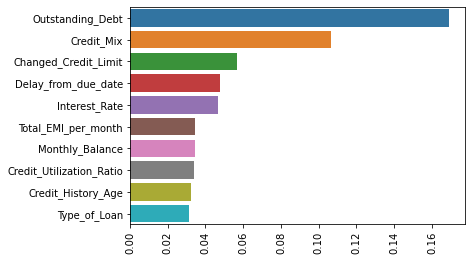

In [207]:
rf = grid_search_results.best_estimator_
feat_imps = zip(feature_names, rf.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x:x[1], reverse=True)))
ax = sns.barplot(list(imps[:10]), list(feats[:10]))
ax.tick_params(axis='x', rotation=90)